In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1.

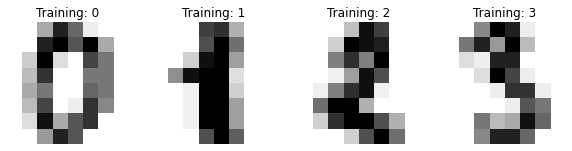

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    print(image)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(digits.images)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [4]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
# flatten the images
data = digits.images.reshape((n_samples, -1))
for i in range(0, 4):
    print(data[i])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14

In [5]:
clf = gbc()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
# Predict the value of the digit on the test subset
np.random.choice(a=predicted, size=100)

array([5, 1, 7, 8, 6, 3, 4, 0, 9, 3, 4, 7, 2, 7, 5, 7, 7, 0, 0, 5, 8, 0,
       8, 6, 0, 8, 3, 0, 6, 6, 2, 5, 6, 9, 9, 7, 5, 9, 2, 3, 1, 9, 0, 7,
       4, 8, 3, 6, 8, 3, 9, 3, 7, 0, 9, 5, 3, 5, 0, 8, 4, 6, 5, 9, 2, 6,
       4, 8, 4, 6, 4, 0, 6, 0, 0, 5, 6, 6, 9, 5, 0, 9, 3, 6, 9, 6, 8, 1,
       5, 1, 0, 8, 6, 7, 8, 3, 9, 1, 1, 8])

In [6]:
# This model is very naive, we need to convert regression results to discrete results.
predicted = np.rint(predicted)
np.random.choice(a=predicted, size=100)

array([9., 0., 3., 3., 4., 8., 4., 4., 3., 7., 1., 9., 8., 1., 5., 9., 4.,
       3., 6., 4., 4., 7., 8., 1., 9., 7., 8., 9., 5., 8., 6., 3., 9., 8.,
       3., 2., 3., 8., 6., 7., 1., 0., 4., 9., 7., 8., 2., 7., 9., 4., 9.,
       6., 7., 8., 4., 8., 5., 4., 4., 5., 2., 4., 9., 3., 7., 5., 7., 5.,
       5., 0., 9., 5., 1., 3., 2., 6., 6., 5., 3., 1., 9., 6., 7., 3., 0.,
       7., 3., 5., 0., 1., 0., 2., 1., 5., 5., 4., 7., 2., 2., 0.])

In [7]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.88      0.84      0.86        91
           2       0.97      0.87      0.92        86
           3       0.89      0.82      0.86        91
           4       0.93      0.89      0.91        92
           5       0.88      0.92      0.90        91
           6       0.96      0.93      0.94        91
           7       0.99      0.93      0.96        89
           8       0.82      0.90      0.86        88
           9       0.78      0.91      0.84        92

    accuracy                           0.90       899
   macro avg       0.91      0.90      0.90       899
weighted avg       0.91      0.90      0.90       899




Confusion matrix:
[[87  0  0  0  0  0  0  0  1  0]
 [ 1 76  0  2  4  0  0  0  0  8]
 [ 1  1 75  5  0  0  0  0  0  4]
 [ 0  2  1 75  0  3  0  1  8  1]
 [ 2  1  0  0 82  0  3  0  0  4]
 [ 0  0  0  0  1 84  1  0  0  5]
 [ 0  2  1  0  0  0 85  0  3  0]
 [ 0  0  0  1  1  3  0 83  1  0]
 [ 1  3  0  1  0  2  0  0 79  2]
 [ 0  1  0  0  0  3  0  0  4 84]]


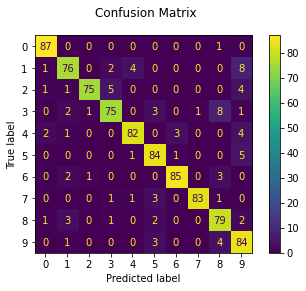

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()